In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [2]:
data=pd.read_csv("card_transaction_fraud.csv")
data

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0


In [3]:
data.columns

Index(['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order', 'fraud'],
      dtype='object')

In [4]:
data.duplicated().sum()

0

In [5]:
data.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [6]:
data.dtypes

distance_from_home                float64
distance_from_last_transaction    float64
ratio_to_median_purchase_price    float64
repeat_retailer                   float64
used_chip                         float64
used_pin_number                   float64
online_order                      float64
fraud                             float64
dtype: object

{'whiskers': [<matplotlib.lines.Line2D at 0x29ddac60e50>,
 'caps': [<matplotlib.lines.Line2D at 0x29ddb31e4f0>,
 'boxes': [<matplotlib.patches.PathPatch at 0x29ddac609d0>],
 'medians': [<matplotlib.lines.Line2D at 0x29ddb31ec10>],
 'fliers': [<matplotlib.lines.Line2D at 0x29ddb31efa0>],
 'means': []}

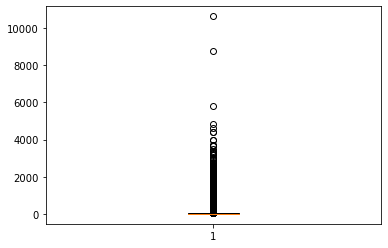

In [7]:
plt.boxplot(data["distance_from_home"],patch_artist=True)

In [8]:
print(f"old shape of data {data.shape}")
Q1=data["distance_from_home"].quantile(0.25)
Q3=data["distance_from_home"].quantile(0.75)
IQR=Q3-Q1
lower=Q1-1.5*IQR
upper=Q3+1.5*IQR
lower_index=np.where(data["distance_from_home"]<=lower)[0]
upper_index=np.where(data["distance_from_home"]>=upper)[0]
data.drop(index=lower_index,inplace=True)
data.drop(index=upper_index,inplace=True)
print(f"new shape of data {data.shape}")

old shape of data (1000000, 8)
new shape of data (896369, 8)


{'whiskers': [<matplotlib.lines.Line2D at 0x29ddb758880>,
 'caps': [<matplotlib.lines.Line2D at 0x29ddb758fa0>,
 'boxes': [<matplotlib.patches.PathPatch at 0x29ddb7584c0>],
 'medians': [<matplotlib.lines.Line2D at 0x29ddb765700>],
 'fliers': [<matplotlib.lines.Line2D at 0x29ddb765a90>],
 'means': []}

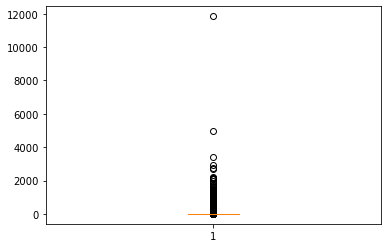

In [9]:
plt.boxplot(data["distance_from_last_transaction"],patch_artist=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x29ddb7c1df0>,
 'caps': [<matplotlib.lines.Line2D at 0x29ddb7d2550>,
 'boxes': [<matplotlib.patches.PathPatch at 0x29ddb7c1a30>],
 'medians': [<matplotlib.lines.Line2D at 0x29ddb7d2c70>],
 'fliers': [<matplotlib.lines.Line2D at 0x29ddb7dc040>],
 'means': []}

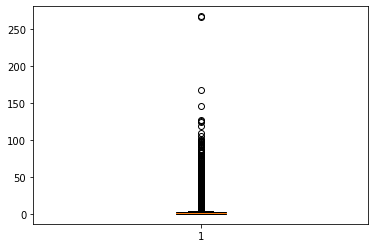

In [10]:
plt.boxplot(data["ratio_to_median_purchase_price"],patch_artist=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x29ddb82dbb0>,
 'caps': [<matplotlib.lines.Line2D at 0x29ddb83e310>,
 'boxes': [<matplotlib.patches.PathPatch at 0x29ddb82d7f0>],
 'medians': [<matplotlib.lines.Line2D at 0x29ddb83ea30>],
 'fliers': [<matplotlib.lines.Line2D at 0x29ddb83edc0>],
 'means': []}

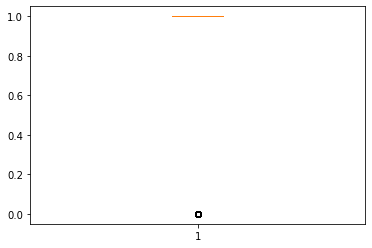

In [11]:
plt.boxplot(data["repeat_retailer"],patch_artist=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x29ddc62b760>,
 'caps': [<matplotlib.lines.Line2D at 0x29ddc62be80>,
 'boxes': [<matplotlib.patches.PathPatch at 0x29ddc62b3a0>],
 'medians': [<matplotlib.lines.Line2D at 0x29ddc6385e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x29ddc638970>],
 'means': []}

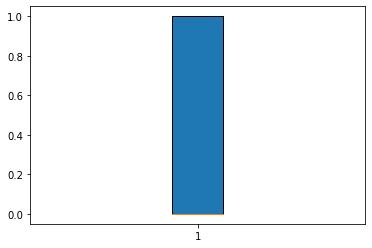

In [12]:
plt.boxplot(data["used_chip"],patch_artist=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x29ddc99b100>,
 'caps': [<matplotlib.lines.Line2D at 0x29ddc99b820>,
 'boxes': [<matplotlib.patches.PathPatch at 0x29ddc989ca0>],
 'medians': [<matplotlib.lines.Line2D at 0x29ddc99bf40>],
 'fliers': [<matplotlib.lines.Line2D at 0x29ddc9a4310>],
 'means': []}

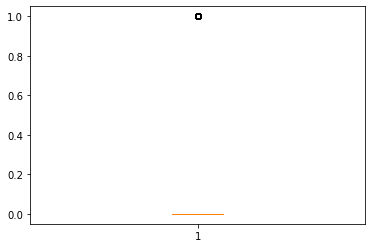

In [13]:
plt.boxplot(data["used_pin_number"],patch_artist=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x29ddc9f8a00>,
 'caps': [<matplotlib.lines.Line2D at 0x29ddca05160>,
 'boxes': [<matplotlib.patches.PathPatch at 0x29ddc9f8640>],
 'medians': [<matplotlib.lines.Line2D at 0x29ddca05880>],
 'fliers': [<matplotlib.lines.Line2D at 0x29ddca05c10>],
 'means': []}

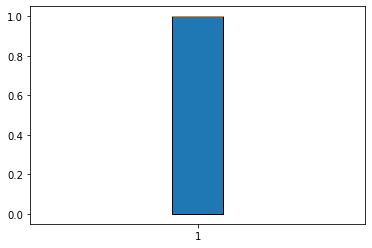

In [14]:
plt.boxplot(data["online_order"],patch_artist=True)

### Logistic Regression

In [15]:
x=data.drop("fraud",axis=1)
y=data["fraud"]

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=23)

In [17]:
model1=LogisticRegression()
model1.fit(x_train,y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [18]:
model1.score(x_train,y_train)

0.97350141891939

In [19]:
model1.score(x_test,y_test)

0.9737496792619119

In [20]:
y_pred=model1.predict(x_test)

In [21]:
pd.DataFrame({"True Values":y_test,"Predicted Values": y_pred})

,True Values,Predicted Values
884660,0.0,0.0
891665,0.0,0.0
805234,0.0,0.0
151996,0.0,0.0
242500,0.0,0.0
...,...,...
716131,0.0,0.0
765895,0.0,0.0
81203,0.0,0.0
817251,0.0,0.0


In [22]:
accuracy_score(y_test,y_pred)

0.9737496792619119

In [23]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[166225,    651],
       [  4055,   8343]], dtype=int64)

Text(33.0, 0.5, 'True Values')

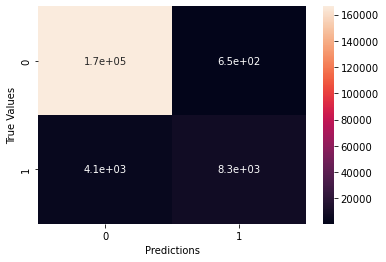

In [24]:
sns.heatmap(cm,annot=True)
plt.xlabel("Predictions")
plt.ylabel("True Values")

In [25]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99    166876
         1.0       0.93      0.67      0.78     12398

    accuracy                           0.97    179274
   macro avg       0.95      0.83      0.88    179274
weighted avg       0.97      0.97      0.97    179274



In [26]:
model2=DecisionTreeClassifier()
model2.fit(x_train,y_train)

DecisionTreeClassifier()

In [27]:
model2.get_depth()

6

In [28]:
model2.score(x_train,y_train)

1.0

In [29]:
model2.score(x_test,y_test)

0.999988843892589

In [30]:
y_pred=model2.predict(x_test)

In [31]:
pd.DataFrame({"True Values":y_test,"Predicted Values": y_pred})

,True Values,Predicted Values
884660,0.0,0.0
891665,0.0,0.0
805234,0.0,0.0
151996,0.0,0.0
242500,0.0,0.0
...,...,...
716131,0.0,0.0
765895,0.0,0.0
81203,0.0,0.0
817251,0.0,0.0


In [32]:
accuracy_score(y_test,y_pred)

0.999988843892589

In [33]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[166874,      2],
       [     0,  12398]], dtype=int64)

Text(33.0, 0.5, 'True Values')

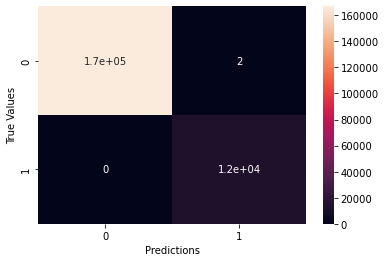

In [34]:
sns.heatmap(cm,annot=True)
plt.xlabel("Predictions")
plt.ylabel("True Values")

In [35]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    166876
         1.0       1.00      1.00      1.00     12398

    accuracy                           1.00    179274
   macro avg       1.00      1.00      1.00    179274
weighted avg       1.00      1.00      1.00    179274

